<a href="https://colab.research.google.com/github/nastaran-farhadi/Machine-learning-practice/blob/main/Clustering_K_means_college_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/jadi/College_Data.csv')
df.head(5)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [5]:
df.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

<Axes: xlabel='Outstate', ylabel='F.Undergrad'>

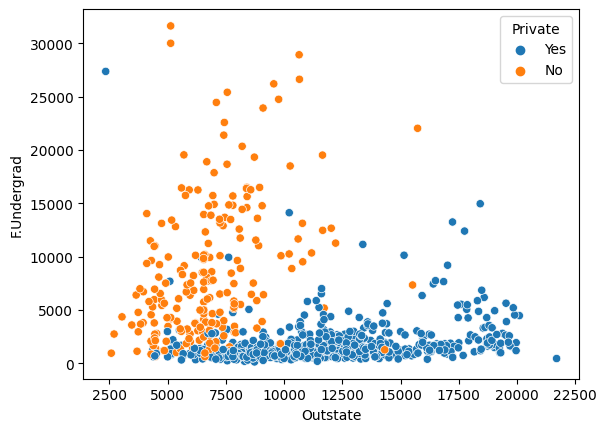

In [7]:
import seaborn as sns
sns.scatterplot(x='Outstate',y='F.Undergrad',hue='Private',data=df)

In [8]:
private= pd.get_dummies(df['Private'],drop_first=True)
private[0:5]

,Yes
0,1
1,1
2,1
3,1
4,1


In [9]:
df=df.drop(['Unnamed: 0','Private'],axis=1)
df.head(5)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [10]:
df=pd.concat([private,df],axis=1)
df.head(5)

,Yes,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [11]:
from sklearn.preprocessing import StandardScaler
x=df.values[:,1:]
x=np.nan_to_num(x)
clus_dataset=StandardScaler()
clus_dataset.fit_transform(x)

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

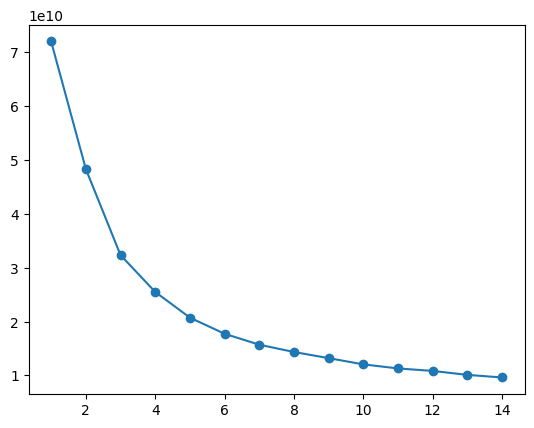

In [17]:
from sklearn.cluster import KMeans
sum_of_squared_distance=[]
K=range(1,15)
for k in K:
  k_means=KMeans(init="k-means++",n_clusters=k,n_init=12)
  k_means.fit(x)
  sum_of_squared_distance.append(k_means.inertia_)
plt.plot(K,sum_of_squared_distance,marker='o')


In [19]:
from sklearn.cluster import KMeans
k_means=KMeans(init="k-means++",n_clusters=3,n_init=12)
k_means.fit(x)
labels=k_means.labels_
print(labels)


[1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 0
 0 1 2 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 1 0 1 1 1 1 2 0 0 0 1
 1 1 1 1 2 2 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 0 0 1 0 2 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 2 1 1 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 0 1 0
 2 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 2 1 1 2 1 2 1 1 1 1 0 1 1 0 2 1 1 1 0 1 1 1
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 2 1 1 1 1 1 2 2 2 1 1 1 0 1 1 1 0 0 1 1 2 0 1 1 2 1 1 1 1 1 1 1
 1 2 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 2 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0
 1 1 2 1 1 1 1 1 2 1 1 1 

In [20]:
df["Grad.Rate_km"]=labels
df.head(5)

,Yes,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Grad.Rate_km
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [21]:
df.groupby('Grad.Rate_km').mean()

,Yes,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Grad.Rate_km,,,,,,,,,,,,,,,,,,
0,0.992248,3791.852713,2046.635659,653.937984,49.837209,77.224806,2573.550388,235.829457,16934.325581,5437.279070,574.604651,1035.751938,87.519380,93.333333,10.204651,35.162791,17813.813953,80.286822
1,0.761062,1701.823009,1236.534513,491.520354,21.819469,49.776991,2226.180531,656.030088,9281.939823,4143.706195,537.015929,1329.796460,67.578761,75.143363,14.636283,20.927434,7830.746903,62.807080
2,0.084337,10621.614458,7300.638554,2939.421687,32.000000,63.469880,15482.506024,3174.554217,8235.855422,4134.879518,594.349398,1888.337349,84.156627,89.554217,16.407229,15.807229,9440.951807,60.506024
